# Deep Learning Fundamentals, Assignment 1
## Predicting diabetes using perceptron algorithms

## DataLoading, Exploration and Baseline

In [1]:
import pandas as pd

# Load the dataset
file_path = 'diabetes (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


#### EDA for data and visualization for features

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.8

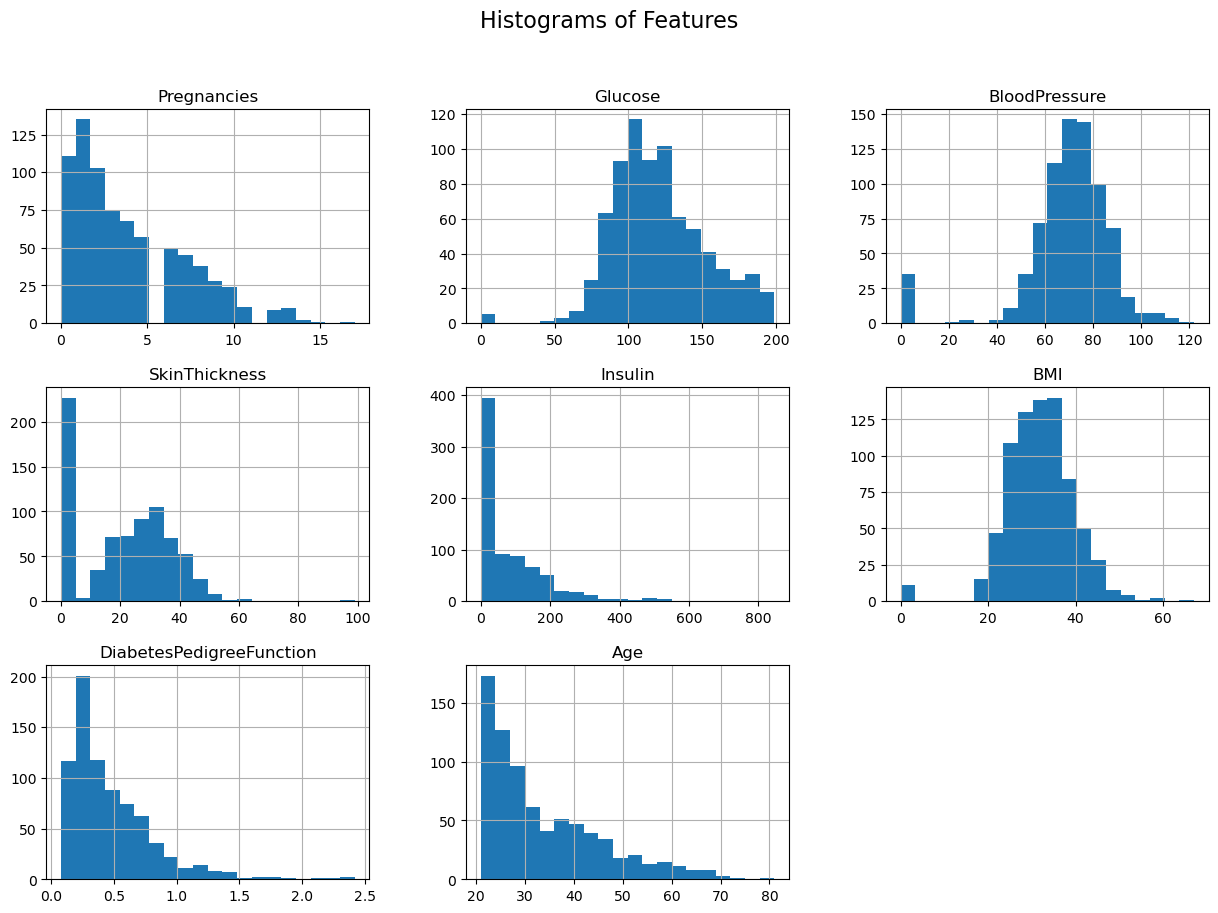

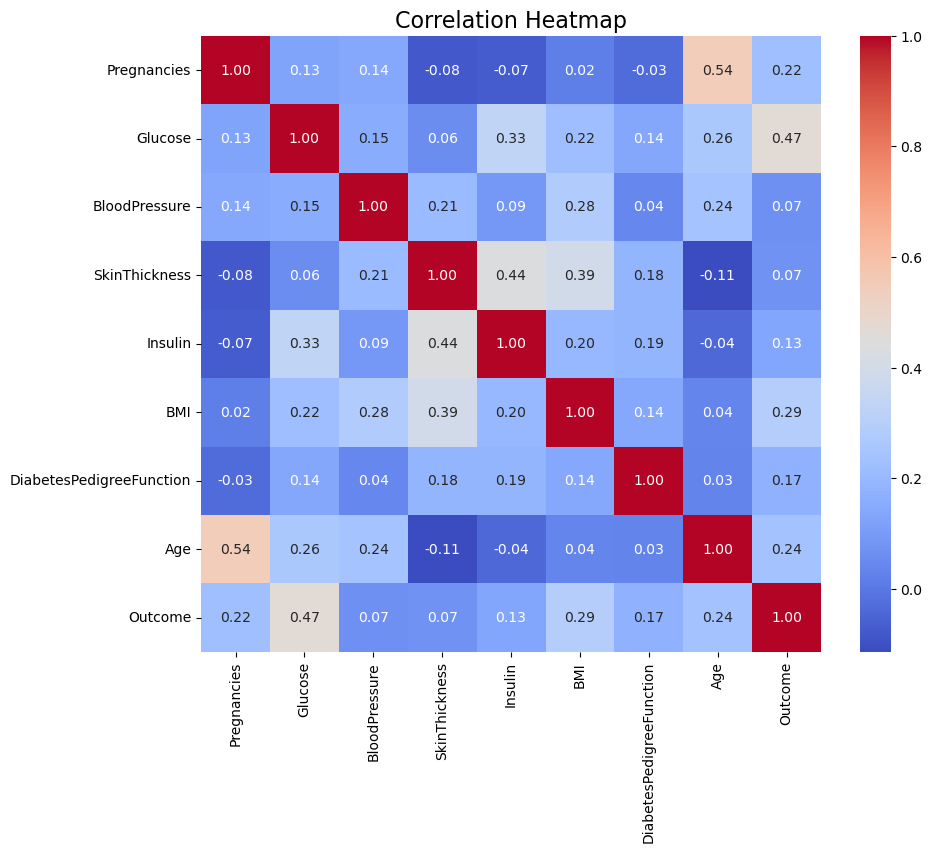

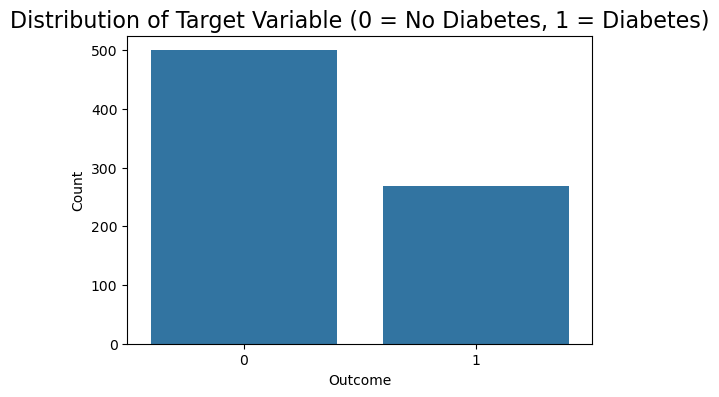

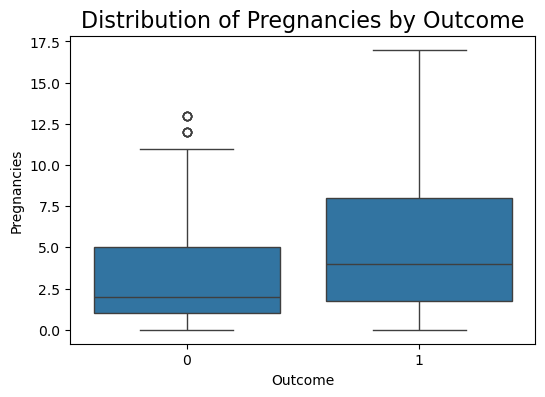

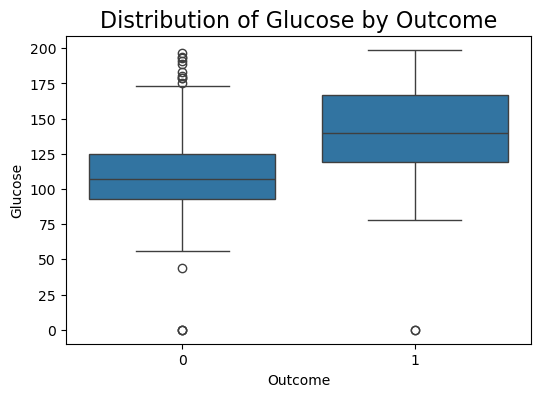

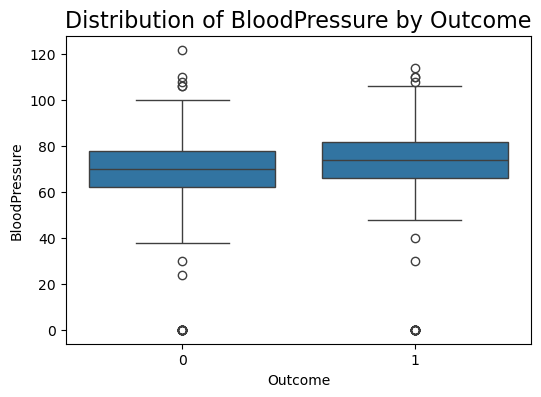

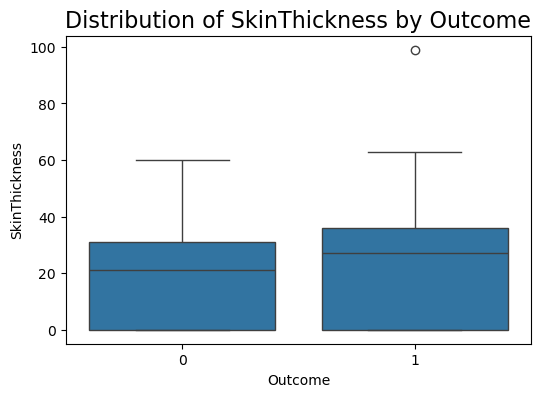

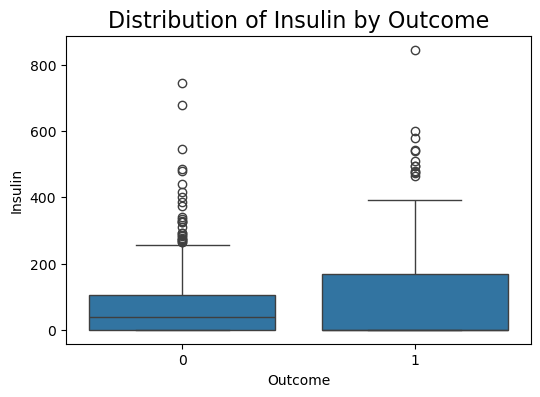

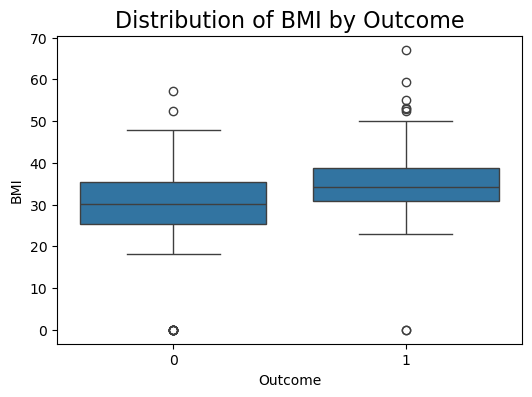

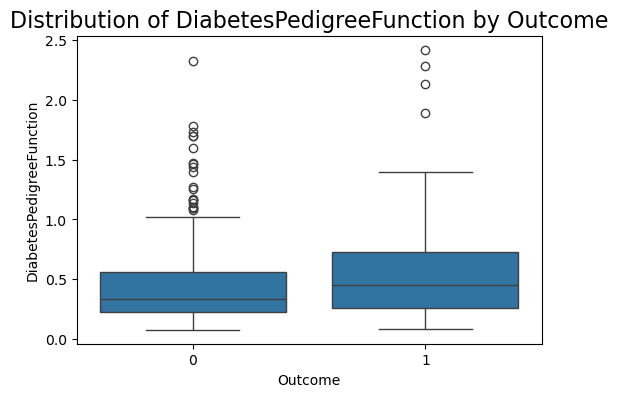

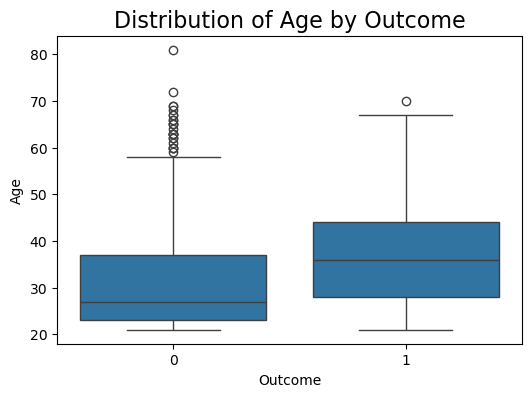

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information about the dataset
print("Basic Information about the Dataset:")
print(data.info())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Plot histograms for all features (excluding the target column)
features = data.columns.drop('Outcome')
data[features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

# Correlation heatmap (including target column)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Display the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Outcome'])
plt.title('Distribution of Target Variable (0 = No Diabetes, 1 = Diabetes)', fontsize=16)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of each feature with respect to the target variable
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Outcome', fontsize=16)
    plt.show()

#### Baseline models

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

# Replace zero values with NaN in specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Separate features and target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Create a pipeline for data preprocessing: median imputation and min-max scaling
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with the median
    ('scaler', MinMaxScaler(feature_range=(-1, 1)))  # Min-Max Scaling to the range [-1, 1]
])

# Apply the pipeline to the training, validation, and test data
X_train = preprocessing_pipeline.fit_transform(X_train)
X_val = preprocessing_pipeline.transform(X_val)
X_test = preprocessing_pipeline.transform(X_test)

# Build a traditional linear perceptron model using Keras
model = Sequential([
    Dense(1, activation='linear', input_shape=(X_train.shape[1],))  # Single neuron with a linear activation
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')  # Linear perceptron loss

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Predict using the linear perceptron (apply threshold for binary classification)
y_val_pred = (model.predict(X_val) >= 0.5).astype(int)
print("Traditional Linear Perceptron Model Performance on Validation Set:")
print(classification_report(y_val, y_val_pred))

# Final evaluation on the test set
y_test_pred = (model.predict(X_test) >= 0.5).astype(int)
print("Traditional Linear Perceptron Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred))

4/4 [==============================] - 0s 2ms/step
Traditional Linear Perceptron Model Performance on Validation Set:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        75
           1       0.60      0.53      0.56        40

    accuracy                           0.71       115
   macro avg       0.68      0.67      0.67       115
weighted avg       0.71      0.71      0.71       115

4/4 [==============================] - 0s 2ms/step
Traditional Linear Perceptron Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        75
           1       0.75      0.51      0.61        41

    accuracy                           0.77       116
   macro avg       0.76      0.71      0.72       116
weighted avg       0.76      0.77      0.75       116



#### Visualization of baseline models

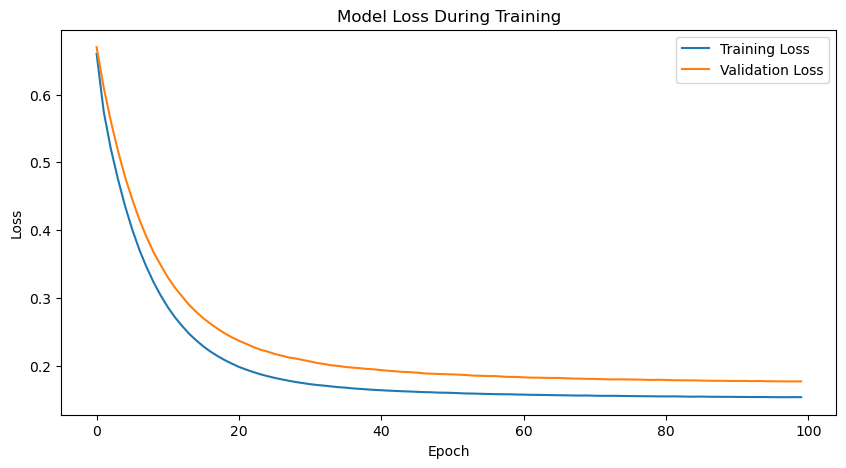

In [4]:
# Visualizing the Training History
def plot_training_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 5))
    
    # Loss plot
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to plot training history
plot_training_history(history)

## Hyperparameter Optimization

C:\Users\asus\AppData\Local\Temp\ipykernel_24316\869958855.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best Parameters: {'batch_size': 32, 'epochs': 50, 'l2_reg': 0.01, 'learning_rate': 0.001}
Best Cross-Validation Recall: 0.7476


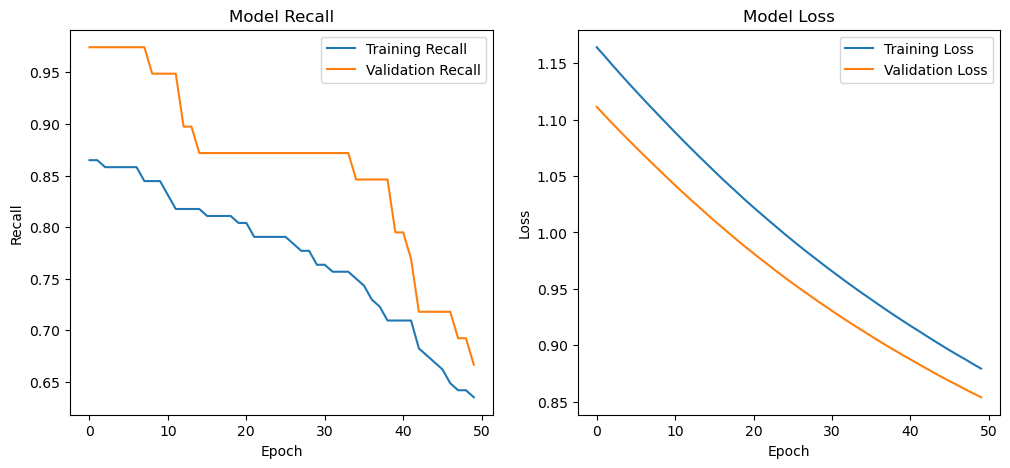

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2  # Import L2 regularizer
import matplotlib.pyplot as plt

# Define a function to create a single-layer perceptron model with a sigmoid activation and regularization
def create_model(learning_rate=0.01, l2_reg=0.01):
    model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],),
              kernel_regularizer=l2(l2_reg))  # Add L2 regularization
    ])
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['Recall'])
    return model

# Wrap the Keras model with KerasClassifier for use in scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid including L2 regularization
param_grid = {
    'batch_size': [16, 32, 64],              # Different batch sizes
    'epochs': [50, 100],                     # Number of epochs to train
    'learning_rate': [0.001, 0.01, 0.1],     # Different learning rates
    'l2_reg': [0.001, 0.01, 0.1]             # Different L2 regularization strengths
}

# Set up GridSearchCV with recall as the scoring metric
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=make_scorer(recall_score))

# Perform the grid search on the training data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and the corresponding recall score
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Recall: {grid_result.best_score_:.4f}")

# Retrieve the best parameters for retraining
best_batch_size = grid_result.best_params_['batch_size']
best_epochs = grid_result.best_params_['epochs']
best_learning_rate = grid_result.best_params_['learning_rate']
best_l2_reg = grid_result.best_params_['l2_reg']

# Retrain the best model on the full training set and include validation data for monitoring
best_model = create_model(learning_rate=best_learning_rate, l2_reg=best_l2_reg)
history = best_model.fit(X_train, y_train, 
                         epochs=best_epochs, 
                         batch_size=best_batch_size, 
                         validation_split=0.2,  # Use 20% of the training data as the validation set
                         verbose=0)

# Function to plot training and validation recall and loss
def plot_training_history(history):
    # Plot training & validation recall values
    plt.figure(figsize=(12, 5))
    
    # Plot recall
    plt.subplot(1, 2, 1)
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot the training history
plot_training_history(history)

## Final results reporting using optimal models

4/4 [==============================] - 0s 2ms/step
Test Set Accuracy: 0.7155
Test Set Precision: 0.5870
Test Set Recall: 0.6585
Test Set F1-Score: 0.6207

Confusion Matrix:
[[56 19]
 [14 27]]


<Figure size 600x600 with 0 Axes>

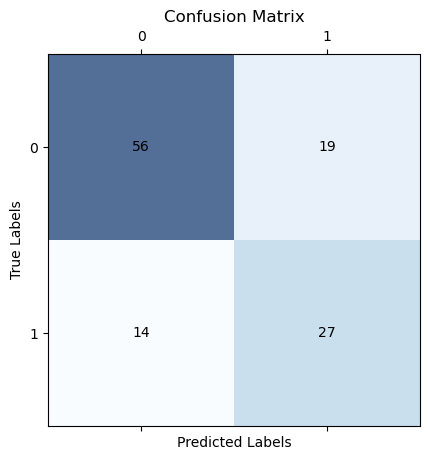


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.75      0.77        75
    Diabetic       0.59      0.66      0.62        41

    accuracy                           0.72       116
   macro avg       0.69      0.70      0.70       116
weighted avg       0.72      0.72      0.72       116



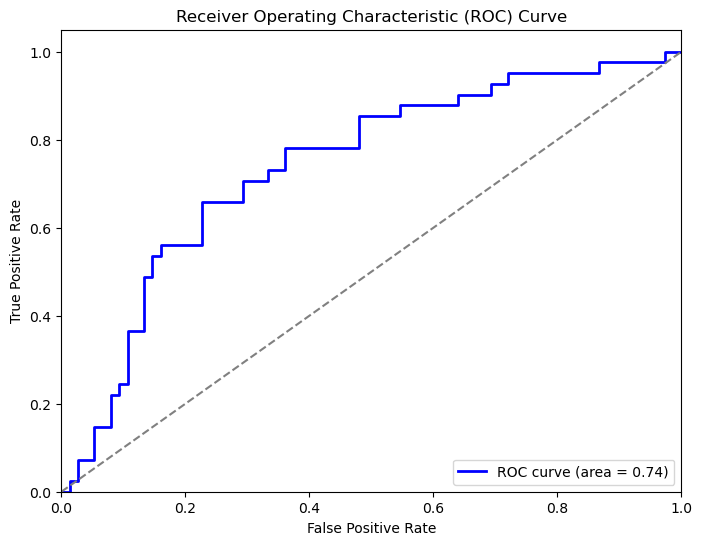

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Retrieve the best model for evaluation on the test set
best_model = create_model(learning_rate=best_learning_rate, l2_reg=best_l2_reg)
best_model.fit(X_train, y_train, epochs=best_epochs, 
               batch_size=best_batch_size, 
               validation_split=0.2,  # Retrain the model with a validation split for monitoring
               verbose=0)

# Get predicted probabilities for the test set
y_test_pred_prob = best_model.predict(X_test).flatten()

# Use a threshold for binary classification (adjust as necessary)
optimal_threshold = 0.5
y_test_pred = (y_test_pred_prob > optimal_threshold).astype(int)

# Calculate and print the evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Precision: {test_precision:.4f}")
print(f"Test Set Recall: {test_recall:.4f}")
print(f"Test Set F1-Score: {test_f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_test_pred, target_names=['Non-Diabetic', 'Diabetic'])
print("\nClassification Report:")
print(class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()